# Soft Actor-Critic
Implementation in jax equinox

In [1]:
import jax
import jax.numpy as jnp
import jax.random as jrandom

import equinox as eqx

import gym

import matplotlib.pyplot as plt
from matplotlib import cm

from src.SoftActorCritic.main import *

from environments.linear import StochasticDoubleIntegrator

## Stochastic Double Integrator

### Initialize

In [7]:
seed = 0
np.random.seed(seed)
key = jrandom.PRNGKey(seed)

x0 = jnp.array([2, 0])
env = StochasticDoubleIntegrator(x0)
env.boundary = jnp.array([5, jnp.inf])

In [8]:
# parameters
num_frames = 3000 #50000
memory_size = 100000
batch_size = 128
initial_random_steps = 1000

obs_size = 2
ctrl_size = 1
learning_rate = 2e-2

agent = SACAgent(
    env, memory_size, key, initial_random_steps=initial_random_steps, obs_size=obs_size, ctrl_size=ctrl_size, lr=learning_rate
)

### Train

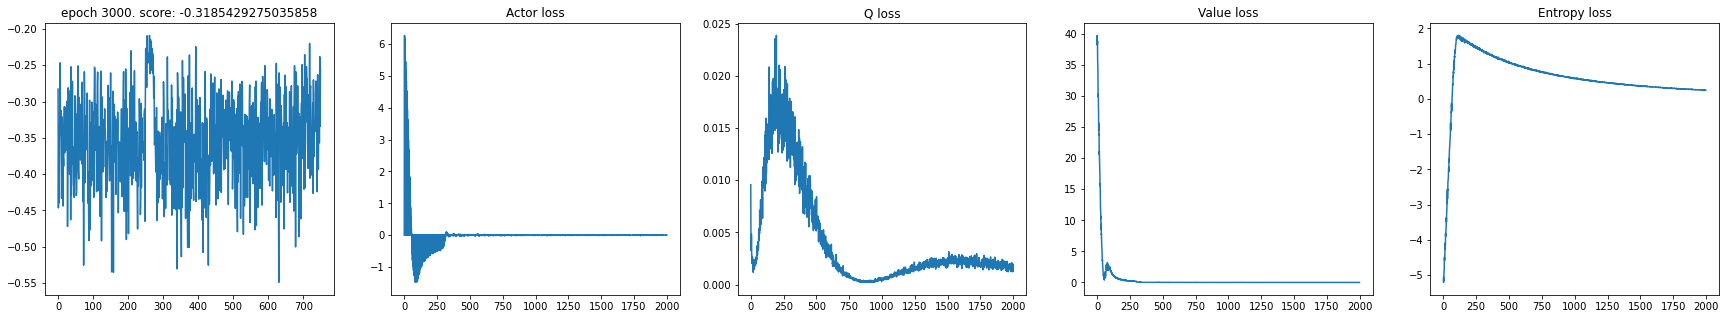

In [9]:
agent.train(num_frames, key, plotting_interval=200)

### Test

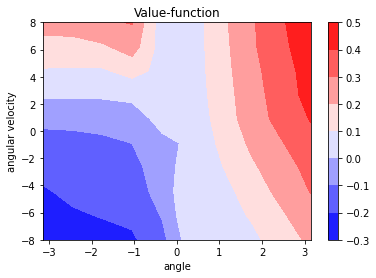

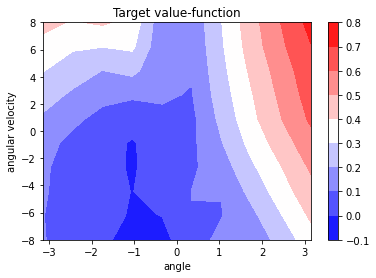

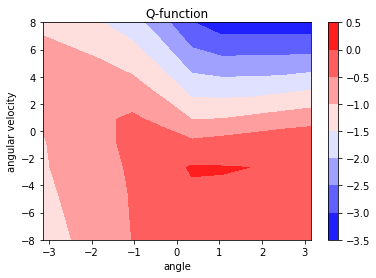

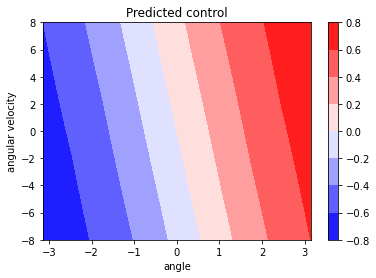

In [10]:
# Test pendulum

key = jrandom.PRNGKey(0)

N = 10
x_space = np.linspace(-np.pi, np.pi, N)
v_space = np.linspace(-8, 8, N)
xv, vv = np.meshgrid(x_space, v_space)
Q = np.zeros((N, N))
V = np.zeros((N, N))
V_target = np.zeros((N, N))
U = np.zeros((N, N))

for i, x in enumerate(x_space):
  for j, v in enumerate(v_space):
    state = jnp.array([x, v])
    control = jnp.array([0])
    V[i, j] = agent.VF(state)
    V_target[i, j] = agent.VF_target(state)
    Q[i, j] = agent.q_min(state, control)
    key, _ = jrandom.split(key)
    U[i, j], _ = agent.actor(state, key, deterministic=True)

fig, ax = plt.subplots()
plt.contourf(xv, vv, V, cmap=cm.bwr)
plt.colorbar()
plt.xlabel('angle')
plt.ylabel('angular velocity')
plt.title('Value-function')
plt.show()

fig, ax = plt.subplots()
plt.contourf(xv, vv, V_target, cmap=cm.bwr)
plt.colorbar()
plt.xlabel('angle')
plt.ylabel('angular velocity')
plt.title('Target value-function')
plt.show()

fig, ax = plt.subplots()
plt.contourf(xv, vv, Q, cmap=cm.bwr)
plt.colorbar()
plt.xlabel('angle')
plt.ylabel('angular velocity')
plt.title('Q-function')
plt.show()

fig, ax = plt.subplots()
plt.contourf(xv, vv, U, cmap=cm.bwr)
plt.colorbar()
plt.xlabel('angle')
plt.ylabel('angular velocity')
plt.title('Predicted control')
plt.show()




## Pendulum

In [2]:
seed = 0
np.random.seed(seed)
key = jrandom.PRNGKey(seed)

# environment
env_id = "Pendulum-v1"
env = gym.make(env_id)


In [3]:
# parameters
n_iter = 20000 #50000
memory_size = 100000
batch_size = 128
initial_random_steps = 10000

agent = SACAgent(
    env, memory_size, key, initial_random_steps=initial_random_steps, control_limit=8
)

### Train

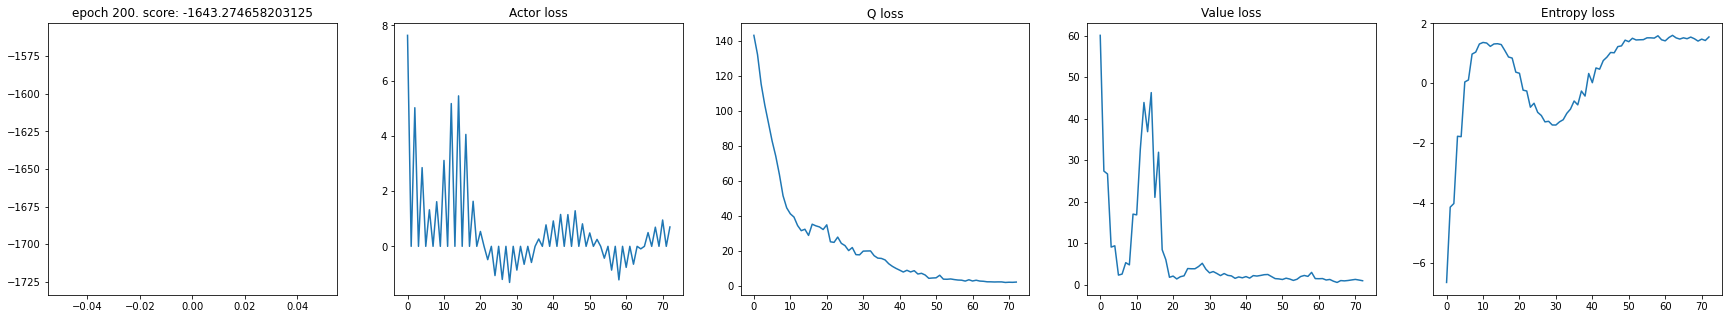

In [4]:
agent.train(n_iter, key, batch_size=batch_size, plotting_interval=200)

### Test

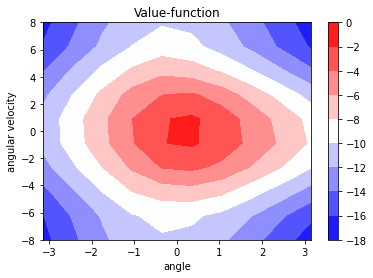

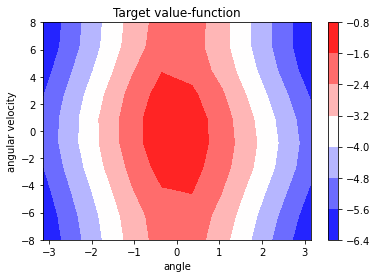

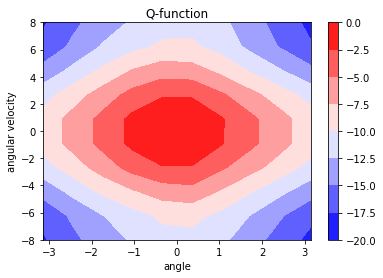

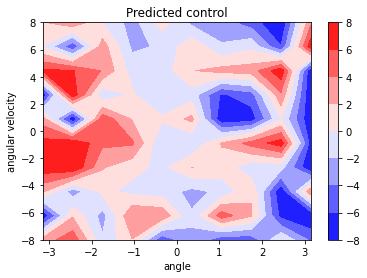

In [6]:
# Test pendulum
key = jrandom.PRNGKey(0)

N = 10
a_space = np.linspace(-np.pi, np.pi, N)
v_space = np.linspace(-8, 8, N)
av, vv = np.meshgrid(a_space, v_space)
Q = np.zeros((N, N))
V = np.zeros((N, N))
V_target = np.zeros((N, N))
U = np.zeros((N, N))

for i, a in enumerate(a_space):
  for j, v in enumerate(v_space):
    x = np.cos(a)
    y = np.sin(a)
    state = jnp.array([x, y, v])
    control = jnp.array([0])
    V[i, j] = agent.VF(state)
    V_target[i, j] = agent.VF_target(state)
    Q[i, j] = agent.q_min(state, control)
    key, _ = jrandom.split(key)
    U[i, j], _ = agent.actor(state, key)

fig, ax = plt.subplots()
plt.contourf(av, vv, V, cmap=cm.bwr)
plt.colorbar()
plt.xlabel('angle')
plt.ylabel('angular velocity')
plt.title('Value-function')
plt.show()

fig, ax = plt.subplots()
plt.contourf(av, vv, V_target, cmap=cm.bwr)
plt.colorbar()
plt.xlabel('angle')
plt.ylabel('angular velocity')
plt.title('Target value-function')
plt.show()

fig, ax = plt.subplots()
plt.contourf(av, vv, Q, cmap=cm.bwr)
plt.colorbar()
plt.xlabel('angle')
plt.ylabel('angular velocity')
plt.title('Q-function')
plt.show()

fig, ax = plt.subplots()
plt.contourf(av, vv, U, cmap=cm.bwr)
plt.colorbar()
plt.xlabel('angle')
plt.ylabel('angular velocity')
plt.title('Predicted control')
plt.show()


